# Welcome to Chornic kidney disease prediction model

#### Purpose
This model aims to predict whether a patient has chronic kidney disease (CKD) based on various data gathered from clinical history, examinations, and laboratory findings.

#### Inspiration
As a doctor working in the Polonnaruwa district of Sri Lanka, I have observed that the prevalence of CKD in this area is alarmingly high, in some hotspots reaching approximately 22.9% of the population. (https://doaj.org/article/9e1d2d9528464fcea616fe02c845841b)

Due to a lack of adequate medical facilities and healthcare staff, many patients remain undiagnosed until they reach late stages of the disease. Which causes increased disease complications, frequent hospital admissions and eventually lead to haemodialysis.

I aspire to develop a machine learning model that can be deployed online to accurately predict whether a patient has CKD. This model is designed to identify patients in the early stages of CKD and guide them toward treatment before they progress to end-stage renal failure.

##### Disclaimer
While I have taken steps to ensure this model is as accurate as possible, it is not intended to be the sole decision-maker for diagnosing CKD. The final diagnosis should be made by a nephrology team based on current clinical protocols and a thorough evaluation of each individual patient. 

If you believe you may have CKD or are experiencing any symptoms, please seek medical assistance from the nearest hospital.


# Steps of the project

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Deployment

## 1. Problem Defnition

Using clinical data available for each person predicting whether they have chronic kidney disease or not

# 2. Data

## 2.1 Data Gathering

Data used for model training is taken from UC Irvine Machine Learning Repository.

https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease

This data was gathered in Tamilnadu, India on 2015, and was available via Creative Commons Attribution 4.0 International (CC BY 4.0) license.

Original data was available as arff format. It was processed with LibreOffice Calc to csv format. for better intergration with python workflow



# 3. Evaluation of data

objective - reach 95% or above accuracy at predicting whether or not a patient has heart disease during the proof of concept to further pursue the project.

# 4. Features

## 4.1 Data dictionary

- Number of Instances:  400 (250 CKD, 150 notckd)
- Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal) 
- Attribute Information

 	1. Age(numerical)
  	  	age in years
 	2. Blood Pressure(numerical)
	       	bp in mm/Hg
 	3. Specific Gravity of Urine(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
 	4. Serum Albumin(nominal)
		al - (0,1,2,3,4,5)
 	5. Blood Sugar(nominal)
		su - (0,1,2,3,4,5)
 	6. Red Blood Cells in Urine (nominal)
		rbc - (normal,abnormal)
 	7. Pus Cell in Urine (nominal)
		pc - (normal,abnormal)
 	8. Pus Cell clumps in Urine (nominal)
		pcc - (present,notpresent)
 	9. Bacteria in Urine (nominal)
		ba  - (present,notpresent)
 	10. Blood Glucose Random(numerical)		
		bgr in mg/dl
 	11. Blood Urea(numerical)	
		bu in mgs/dl
 	12. Serum Creatinine(numerical)	
		sc in mgs/dl
 	13. Sodium(numerical)
		sod in mEq/L
 	14. Potassium(numerical)	
		pot in mEq/L
 	15. Hemoglobin(numerical)
		hemo in g/dl
 	16. Packed  Cell Volume(numerical)
 	17. White Blood Cell Count(numerical)
		wc in cells/cumm
 	18. Red Blood Cell Count(numerical)	
		rc in millions/cmm
 	19. Hypertension(nominal)	
		htn - (yes,no)
 	20. Diabetes Mellitus(nominal)	
		dm - (yes,no)
 	21. Coronary Artery Disease(nominal)
		cad - (yes,no)
 	22. Appetite(nominal)	
		appet - (good,poor)
 	23. Pedal Edema(nominal)
		pe - (yes,no)	
 	24. Anemia(nominal)
		ane - (yes,no)
 	25. Class (nominal)		
		class - (ckd,notckd) (whether person has ckd or not)

## 4.1 Importing the tool

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# setting numpy random seed
np.random.seed(10)

## 4.2 Importing data

In [2]:
#importing csv and making a pandas dataframe

ckd_data = pd.read_csv("ckd_data1.csv")
ckd_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


## 4.3 Data Exploration and manipulation

objective is to check

- what is the problem needed to solve ?
- what type of data present ?
- are there any missing data ?
- how to deal with misssng data ?
- are there any outliers ?
- is it needed to remove or add features ?

In [3]:
ckd_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
ckd_data['class'].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

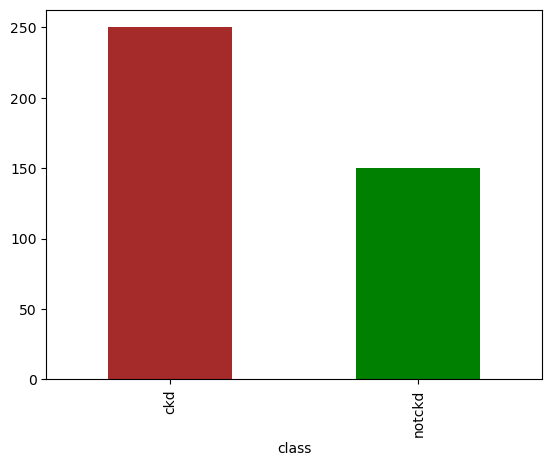

In [5]:
ckd_data['class'].value_counts().plot(kind = 'bar', color=["brown", "green"]);

In [6]:
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     330 non-null    object 
 16  wbcc    295 non-null    object 
 17  rbcc    270 non-null    object 
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

### changing datatype to numerical in several columns

##### changing class column values, ckd = 1, notckd = 0

In [7]:
replacements = {
    'ckd': '1',
    'notckd': '0',
}
ckd_data['class'] = ckd_data['class'].replace(replacements)

In [8]:
column_to_numeric = ['wbcc', 'rbcc', 'class']
for column in column_to_numeric:
    ckd_data[column] = pd.to_numeric(ckd_data[column], errors='coerce')
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     330 non-null    object 
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

### Finding missing data

In [9]:
ckd_data.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [10]:
ckd_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,wbcc,rbcc,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,294.000000,269.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,8406.122449,4.707435,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,2944.474190,1.025323,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,6500.000000,3.900000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,8000.000000,4.800000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,9800.000000,5.400000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000


### Comparing each column with class

#### CKD frequency according to Hypertension

In [11]:
pd.crosstab(ckd_data['htn'], ckd_data['class'])

class,0,1
htn,,
no,148,103
yes,0,147


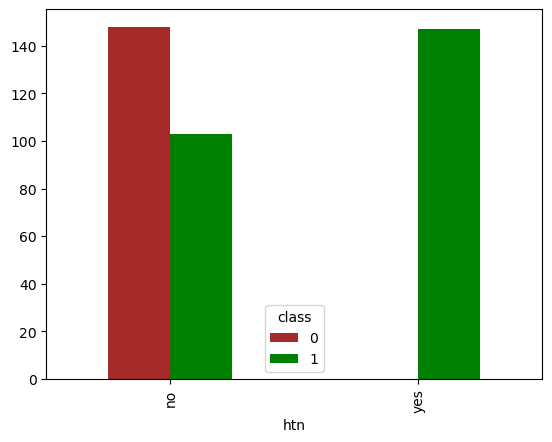

In [12]:
pd.crosstab(ckd_data['htn'], ckd_data['class']).plot(kind = 'bar', color=["brown", "green"]);

#### Age vs Serum Creatinine(sc) for Chronic Kidney disease

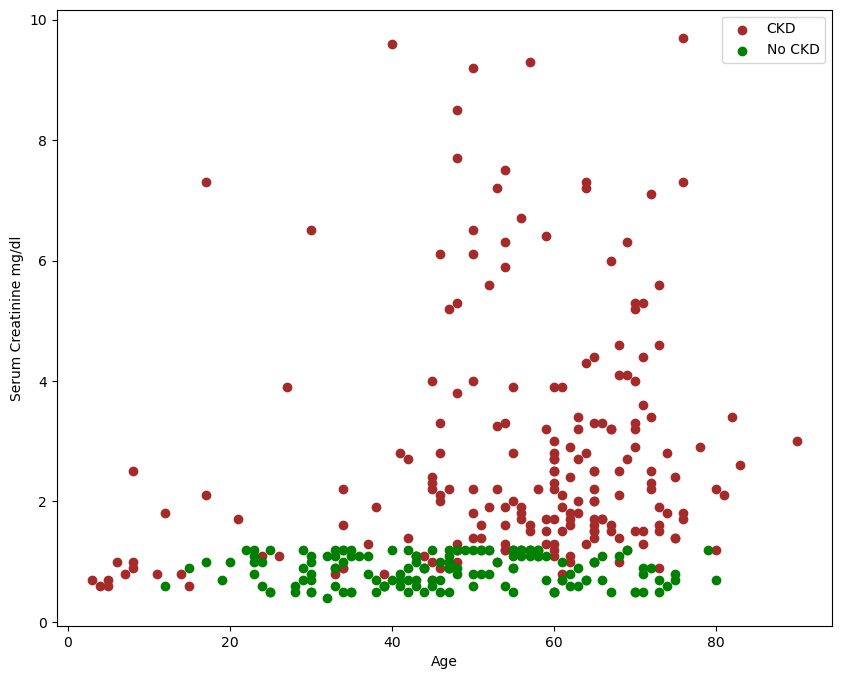

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(ckd_data['age'][(ckd_data['class'] == 1) & (ckd_data['sc'] < 10)], 
            ckd_data['sc'][(ckd_data['class'] == 1) & (ckd_data['sc'] < 10)], 
            color='brown', label='CKD')
plt.scatter(ckd_data['age'][(ckd_data['class'] == 0) & (ckd_data['sc'] < 10)], 
            ckd_data['sc'][(ckd_data['class'] == 0) & (ckd_data['sc'] < 10)], 
            color='green', label='No CKD');
plt.xlabel('Age')
plt.ylabel('Serum Creatinine mg/dl')
plt.legend();

#### Distribution of age

In [14]:
# mean age of the people in the dataset
ckd_data.age.mean()

np.float64(51.48337595907928)

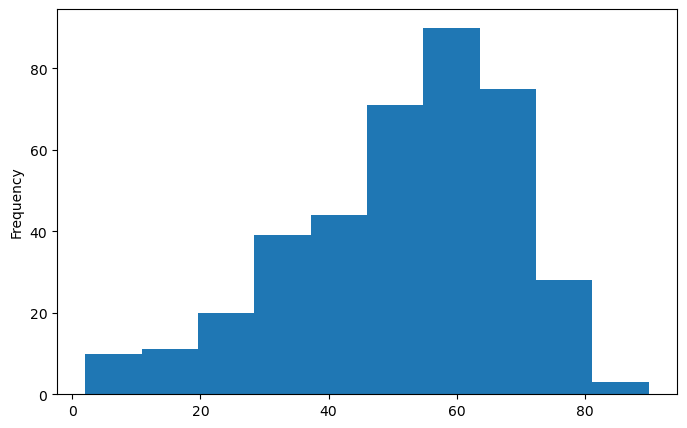

In [15]:
# Distribution of age in the dataset
ckd_data.age.plot.hist(figsize=(8,5));

### Check correlation between numerical columns

In [16]:
df_numeric = ckd_data.select_dtypes(include=['number'])
df_numeric.corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,wbcc,rbcc,class
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,0.118339,-0.268896,0.227268
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,0.029753,-0.261936,0.294077
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,-0.236215,0.579476,-0.732163
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,0.231989,-0.566437,0.627090
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,0.184893,-0.237448,0.344070
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,0.150015,-0.281541,0.419672
bu,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,0.050462,-0.579087,0.380605
sc,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.006390,-0.400852,0.299969
sod,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.007277,0.344873,-0.375674
pot,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.105576,-0.158309,0.084541


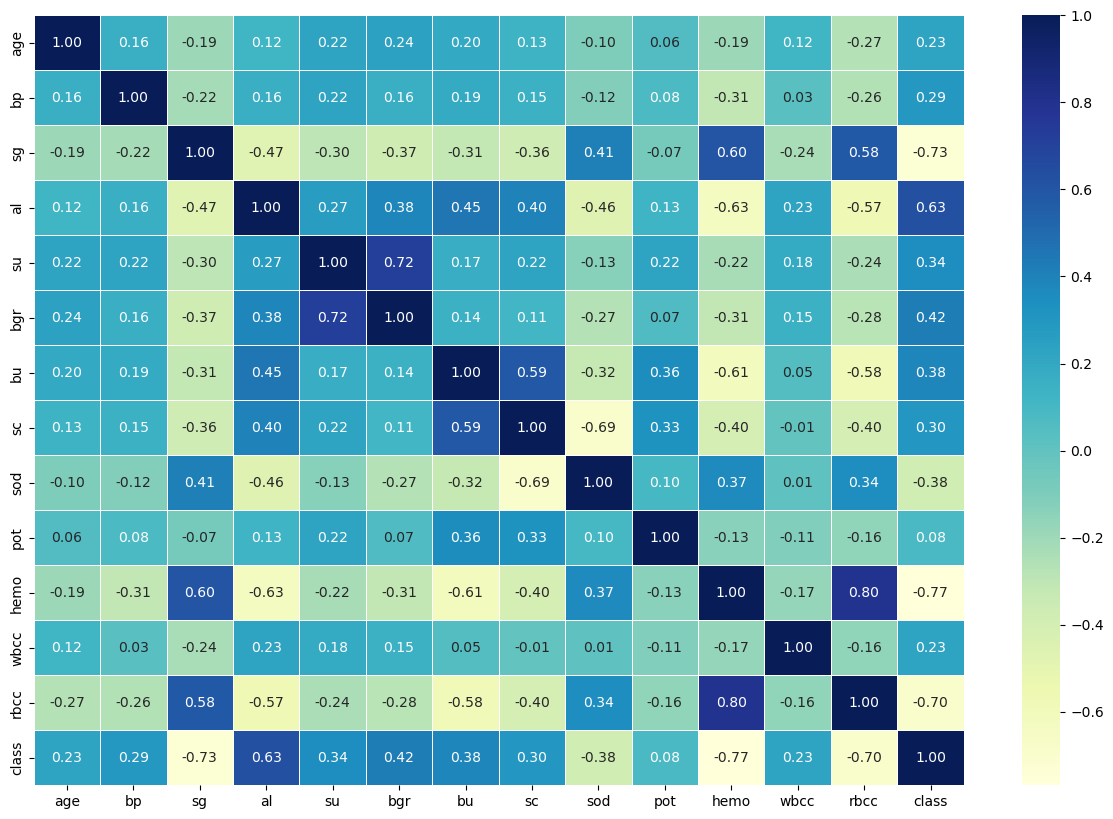

In [17]:
# making correlation matrix
corr_matrix = df_numeric.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## 4.4 Preparing data for machine learning

In [18]:
ckd_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300.0,4.6,no,no,no,good,no,no,1


### Finding missing data

In [19]:
for col in ckd_data.columns:
    print(ckd_data[col].value_counts())

age
60.0    19
65.0    17
50.0    12
48.0    12
55.0    12
        ..
90.0     1
2.0      1
78.0     1
22.0     1
79.0     1
Name: count, Length: 76, dtype: int64
bp
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: count, dtype: int64
sg
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: count, dtype: int64
al
0.0    199
1.0     44
3.0     43
2.0     43
4.0     24
5.0      1
Name: count, dtype: int64
su
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64
rbc
normal      201
abnormal     47
Name: count, dtype: int64
pc
normal      259
abnormal     76
Name: count, dtype: int64
pcc
notpresent    354
present        42
Name: count, dtype: int64
ba
notpresent    374
present        22
Name: count, dtype: int64
bgr
99.0     10
100.0     9
93.0      9
107.0     8
117.0     6
         ..
463.0     1
269.0     1
116.0     1
134.0     1
87.0      1
Name

Thre are some unusual strings like \tno, \tyes that needs to be converted to proper values

In [20]:
cols_to_clean = ['cad', 'dm', 'pcv']

for col in cols_to_clean:
    ckd_data[col] = ckd_data[col].str.strip()


finding pcv mean and appling it to \t?

In [21]:
pcv_mean = pd.to_numeric(ckd_data['pcv'], errors='coerce').mean()
pcv_mean

np.float64(38.88449848024316)

In [22]:
for col in ckd_data.columns:
    print(ckd_data[col].value_counts())

age
60.0    19
65.0    17
50.0    12
48.0    12
55.0    12
        ..
90.0     1
2.0      1
78.0     1
22.0     1
79.0     1
Name: count, Length: 76, dtype: int64
bp
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: count, dtype: int64
sg
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: count, dtype: int64
al
0.0    199
1.0     44
3.0     43
2.0     43
4.0     24
5.0      1
Name: count, dtype: int64
su
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64
rbc
normal      201
abnormal     47
Name: count, dtype: int64
pc
normal      259
abnormal     76
Name: count, dtype: int64
pcc
notpresent    354
present        42
Name: count, dtype: int64
ba
notpresent    374
present        22
Name: count, dtype: int64
bgr
99.0     10
100.0     9
93.0      9
107.0     8
117.0     6
         ..
463.0     1
269.0     1
116.0     1
134.0     1
87.0      1
Name

In [23]:
replacements = {
    '43': 43,
    '?' : 39 
}
ckd_data = ckd_data.replace(replacements)

In [24]:
for col in ckd_data.columns:
    print(ckd_data[col].value_counts())

age
60.0    19
65.0    17
50.0    12
48.0    12
55.0    12
        ..
90.0     1
2.0      1
78.0     1
22.0     1
79.0     1
Name: count, Length: 76, dtype: int64
bp
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: count, dtype: int64
sg
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: count, dtype: int64
al
0.0    199
1.0     44
3.0     43
2.0     43
4.0     24
5.0      1
Name: count, dtype: int64
su
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64
rbc
normal      201
abnormal     47
Name: count, dtype: int64
pc
normal      259
abnormal     76
Name: count, dtype: int64
pcc
notpresent    354
present        42
Name: count, dtype: int64
ba
notpresent    374
present        22
Name: count, dtype: int64
bgr
99.0     10
100.0     9
93.0      9
107.0     8
117.0     6
         ..
463.0     1
269.0     1
116.0     1
134.0     1
87.0      1
Name

In [25]:
#finding how many missing data present
ckd_data.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

### Removing unwanted columns

In [ ]:
# bgr can vastly vary during time of the day due to multiple factors including diet therefore dropped
# rbcc, pcc have very strong correlation with hb and missing 152 and 70 data entries, therefore dropped
# effect of blood sugar on ckd already represented with presence of dm, so su is dropped
# albumin - in data set what are the cutoff ranges for each category not given - dropped
# urine sg, pc, pcc dropped to reduce model training load
ckd_data = pd.read_csv("ckd_data1.csv")
ckd_data = ckd_data.drop(['bgr','rbcc', 'su', 'al', 'pcv', 'sg', 'pc', 'pcc'], axis=1)
ckd_data

,age,bp,rbc,ba,bu,sc,sod,pot,hemo,wbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,NaN,notpresent,36.0,1.2,NaN,NaN,15.4,7800,yes,yes,no,good,no,no,ckd
1,7.0,50.0,NaN,notpresent,18.0,0.8,NaN,NaN,11.3,6000,no,no,no,good,no,no,ckd
2,62.0,80.0,normal,notpresent,53.0,1.8,NaN,NaN,9.6,7500,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,normal,notpresent,56.0,3.8,111.0,2.5,11.2,6700,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,normal,notpresent,26.0,1.4,NaN,NaN,11.6,7300,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,normal,notpresent,49.0,0.5,150.0,4.9,15.7,6700,no,no,no,good,no,no,notckd
396,42.0,70.0,normal,notpresent,31.0,1.2,141.0,3.5,16.5,7800,no,no,no,good,no,no,notckd
397,12.0,80.0,normal,notpresent,26.0,0.6,137.0,4.4,15.8,6600,no,no,no,good,no,no,notckd
398,17.0,60.0,normal,notpresent,50.0,1.0,135.0,4.9,14.2,7200,no,no,no,good,no,no,notckd


In [27]:
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   rbc     248 non-null    object 
 3   ba      396 non-null    object 
 4   bu      381 non-null    float64
 5   sc      383 non-null    float64
 6   sod     313 non-null    float64
 7   pot     312 non-null    float64
 8   hemo    348 non-null    float64
 9   wbcc    295 non-null    object 
 10  htn     398 non-null    object 
 11  dm      398 non-null    object 
 12  cad     398 non-null    object 
 13  appet   399 non-null    object 
 14  pe      399 non-null    object 
 15  ane     399 non-null    object 
 16  class   400 non-null    object 
dtypes: float64(7), object(10)
memory usage: 53.3+ KB


In [28]:
# List of categorical columns, and impute them using mode

categorical_columns = ['rbc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for column in categorical_columns:
    mode_value = ckd_data[column].mode()[0]
    ckd_data[column].fillna(mode_value, inplace=True)

ckd_data

/tmp/ipykernel_127531/4025607187.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ckd_data[column].fillna(mode_value, inplace=True)


,age,bp,rbc,ba,bu,sc,sod,pot,hemo,wbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,normal,notpresent,36.0,1.2,NaN,NaN,15.4,7800,yes,yes,no,good,no,no,ckd
1,7.0,50.0,normal,notpresent,18.0,0.8,NaN,NaN,11.3,6000,no,no,no,good,no,no,ckd
2,62.0,80.0,normal,notpresent,53.0,1.8,NaN,NaN,9.6,7500,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,normal,notpresent,56.0,3.8,111.0,2.5,11.2,6700,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,normal,notpresent,26.0,1.4,NaN,NaN,11.6,7300,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,normal,notpresent,49.0,0.5,150.0,4.9,15.7,6700,no,no,no,good,no,no,notckd
396,42.0,70.0,normal,notpresent,31.0,1.2,141.0,3.5,16.5,7800,no,no,no,good,no,no,notckd
397,12.0,80.0,normal,notpresent,26.0,0.6,137.0,4.4,15.8,6600,no,no,no,good,no,no,notckd
398,17.0,60.0,normal,notpresent,50.0,1.0,135.0,4.9,14.2,7200,no,no,no,good,no,no,notckd


In [29]:
#finding how many missing data present
ckd_data.isna().sum()

age        9
bp        12
rbc        0
ba         0
bu        19
sc        17
sod       87
pot       88
hemo      52
wbcc     105
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

In [30]:
numerical_columns = ['age', 'bp', 'bu', 'sc', 'sod', 'pot', 'hemo', 'wbcc']

for col in numerical_columns:
    ckd_data[col] = pd.to_numeric(ckd_data[col], errors='coerce')
    
for col in numerical_columns:
    ckd_data[col] = ckd_data[col].fillna(ckd_data[col].mean())

ckd_data

,age,bp,rbc,ba,bu,sc,sod,pot,hemo,wbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,normal,notpresent,36.0,1.2,137.528754,4.627244,15.4,7800.0,yes,yes,no,good,no,no,ckd
1,7.0,50.0,normal,notpresent,18.0,0.8,137.528754,4.627244,11.3,6000.0,no,no,no,good,no,no,ckd
2,62.0,80.0,normal,notpresent,53.0,1.8,137.528754,4.627244,9.6,7500.0,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,normal,notpresent,56.0,3.8,111.000000,2.500000,11.2,6700.0,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,normal,notpresent,26.0,1.4,137.528754,4.627244,11.6,7300.0,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,normal,notpresent,49.0,0.5,150.000000,4.900000,15.7,6700.0,no,no,no,good,no,no,notckd
396,42.0,70.0,normal,notpresent,31.0,1.2,141.000000,3.500000,16.5,7800.0,no,no,no,good,no,no,notckd
397,12.0,80.0,normal,notpresent,26.0,0.6,137.000000,4.400000,15.8,6600.0,no,no,no,good,no,no,notckd
398,17.0,60.0,normal,notpresent,50.0,1.0,135.000000,4.900000,14.2,7200.0,no,no,no,good,no,no,notckd


In [31]:
#finding how many missing data present
ckd_data.isna().sum()

age      0
bp       0
rbc      0
ba       0
bu       0
sc       0
sod      0
pot      0
hemo     0
wbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

### Changing categorical columns to binary
for this one hot encoder is used

In [32]:
ckd_data = pd.get_dummies(ckd_data, columns=categorical_columns)
ckd_data

,age,bp,bu,sc,sod,pot,hemo,wbcc,class,rbc_abnormal,...,dm_yes,cad_\tno,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,48.0,80.0,36.0,1.2,137.528754,4.627244,15.4,7800.0,ckd,False,...,True,False,True,False,True,False,True,False,True,False
1,7.0,50.0,18.0,0.8,137.528754,4.627244,11.3,6000.0,ckd,False,...,False,False,True,False,True,False,True,False,True,False
2,62.0,80.0,53.0,1.8,137.528754,4.627244,9.6,7500.0,ckd,False,...,True,False,True,False,False,True,True,False,False,True
3,48.0,70.0,56.0,3.8,111.000000,2.500000,11.2,6700.0,ckd,False,...,False,False,True,False,False,True,False,True,False,True
4,51.0,80.0,26.0,1.4,137.528754,4.627244,11.6,7300.0,ckd,False,...,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,49.0,0.5,150.000000,4.900000,15.7,6700.0,notckd,False,...,False,False,True,False,True,False,True,False,True,False
396,42.0,70.0,31.0,1.2,141.000000,3.500000,16.5,7800.0,notckd,False,...,False,False,True,False,True,False,True,False,True,False
397,12.0,80.0,26.0,0.6,137.000000,4.400000,15.8,6600.0,notckd,False,...,False,False,True,False,True,False,True,False,True,False
398,17.0,60.0,50.0,1.0,135.000000,4.900000,14.2,7200.0,notckd,False,...,False,False,True,False,True,False,True,False,True,False


In [33]:
# changing class to binary
ckd_data['class'] = ckd_data['class'].replace({'ckd':1, 'notckd':0})

/tmp/ipykernel_127531/136138353.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ckd_data['class'] = ckd_data['class'].replace({'ckd':1, 'notckd':0})


In [34]:
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            400 non-null    float64
 1   bp             400 non-null    float64
 2   bu             400 non-null    float64
 3   sc             400 non-null    float64
 4   sod            400 non-null    float64
 5   pot            400 non-null    float64
 6   hemo           400 non-null    float64
 7   wbcc           400 non-null    float64
 8   class          400 non-null    int64  
 9   rbc_abnormal   400 non-null    bool   
 10  rbc_normal     400 non-null    bool   
 11  ba_notpresent  400 non-null    bool   
 12  ba_present     400 non-null    bool   
 13  htn_no         400 non-null    bool   
 14  htn_yes        400 non-null    bool   
 15  dm_	no         400 non-null    bool   
 16  dm_	yes        400 non-null    bool   
 17  dm_ yes        400 non-null    bool   
 18  dm_no     

In [35]:
# dropping poorly formatted columns
ckd_data = ckd_data.drop(['dm_\tyes', 'cad_\tno', 'dm_\tno'], axis=1)

In [36]:
# Dropping several more clumns to reduce model training load.
# dm_ yes is mistakenly created and has no significance
ckd_data = ckd_data.drop(['ba_notpresent','ba_present', 'dm_ yes'], axis=1)

# 5. Modelling

## 5.1 Building Model

usually best performing model for labeled data is **RandomForestClassifier**, It will be scored first and then also compared to other machine learning models

In [37]:
# Split data into X and y
X = ckd_data.drop("class", axis=1)

y = ckd_data["class"]

In [38]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 5.2 Evaluating model

In [40]:
model.score(X_test, y_test)

0.9625

In [41]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")


Cross-Validation Scores: [0.984375 0.984375 0.984375 0.953125 0.96875 ]


In [42]:
# Get feature importance
importance = model.feature_importances_

# Convert to percentages
importance_percentage = importance * 100
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance (%)': importance_percentage})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance (%)', ascending=False)
print(feature_importance)

         Feature  Importance (%)
6           hemo       27.680113
3             sc       16.681513
13        dm_yes        7.173566
10        htn_no        7.126456
11       htn_yes        6.208107
2             bu        6.059697
12         dm_no        6.047587
4            sod        5.123404
7           wbcc        4.129842
1             bp        2.222847
0            age        1.840873
16    appet_good        1.615256
18         pe_no        1.581313
19        pe_yes        1.250744
5            pot        1.226881
9     rbc_normal        1.096645
17    appet_poor        0.991526
8   rbc_abnormal        0.722739
21       ane_yes        0.588403
20        ane_no        0.497191
15       cad_yes        0.076022
14        cad_no        0.059275


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9625
Precision: 0.9803921568627451
Recall: 0.9615384615384616
F1 Score: 0.970873786407767


## 5.3 Comparing performance between machine learning models

models selected are

1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier



In [44]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    np.random.seed(10)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [45]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/home/pcc1/Desktop/ml_project1/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9, 'KNN': 0.7, 'Random Forest': 0.975}

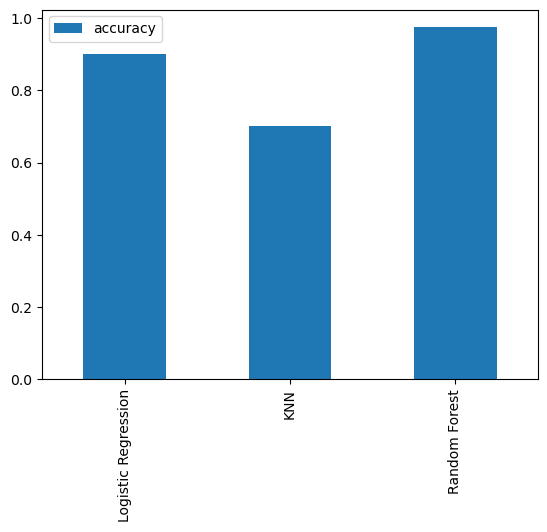

In [46]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

**RandomForestClassifier is the best performing model among 3 models**

## 5.3 Tuning the model

In [47]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(200, 500, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [48]:
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)


In [49]:
# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestC...ier(n_jobs=-1)
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([200, 2...50, 400, 450])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [50]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': np.int64(400),
 'min_samples_split': np.int64(10),
 'min_samples_leaf': np.int64(1),
 'max_depth': 10}

In [51]:
# Evaluate the randomized search RandomForestClassifier model
model_score = rs_rf.score(X_test, y_test)
model_score

0.9625

## 5.4 Evaluating learned model

In [52]:
y_preds = rs_rf.predict(X_test)
y_preds

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [53]:
y_test

332    0
111    1
352    0
205    1
56     1
      ..
304    0
187    1
166    1
64     1
27     1
Name: class, Length: 80, dtype: int64

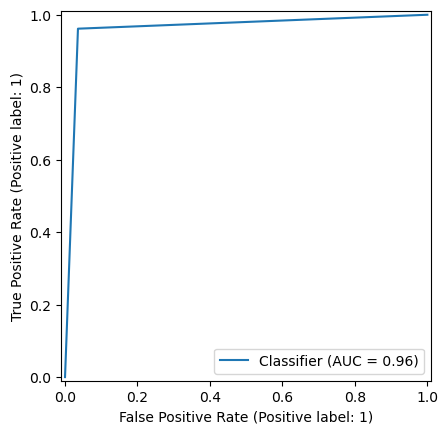

In [54]:
# Create ROC Curve Display
RocCurveDisplay.from_predictions(y_test, y_preds);

In [55]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[27  1]
 [ 2 50]]


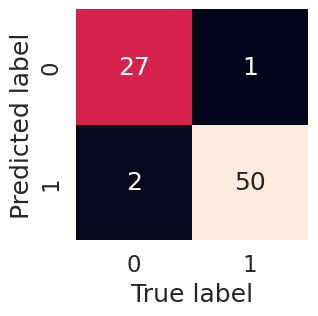

In [56]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [57]:
cls_report = classification_report(y_test, y_preds)
print(cls_report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.98      0.96      0.97        52

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



## 5.5 Feature importance

In [58]:
# getting best model
best_model = rs_rf.best_estimator_
best_model

,n_estimators,np.int64(400)
,criterion,'gini'
,max_depth,10
,min_samples_split,np.int64(10)
,min_samples_leaf,np.int64(1)
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
importance = best_model.feature_importances_
importance

array([0.01303711, 0.02222353, 0.04116151, 0.19357373, 0.0587946 ,
       0.01051925, 0.31158144, 0.02071092, 0.00750758, 0.01072045,
       0.07462888, 0.06256053, 0.06356608, 0.04731576, 0.00057594,
       0.00079559, 0.01217013, 0.01142513, 0.01497058, 0.01527979,
       0.00303067, 0.00385079])

In [60]:
# Get feature importance
importance = best_model.feature_importances_

# Convert to percentages
importance_percentage = importance * 100
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance (%)': importance_percentage})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance (%)', ascending=False)
print(feature_importance)

         Feature  Importance (%)
6           hemo       31.158144
3             sc       19.357373
10        htn_no        7.462888
12         dm_no        6.356608
11       htn_yes        6.256053
4            sod        5.879460
13        dm_yes        4.731576
2             bu        4.116151
1             bp        2.222353
7           wbcc        2.071092
19        pe_yes        1.527979
18         pe_no        1.497058
0            age        1.303711
16    appet_good        1.217013
17    appet_poor        1.142513
9     rbc_normal        1.072045
5            pot        1.051925
8   rbc_abnormal        0.750758
21       ane_yes        0.385079
20        ane_no        0.303067
15       cad_yes        0.079559
14        cad_no        0.057594


<Axes: ylabel='Feature'>

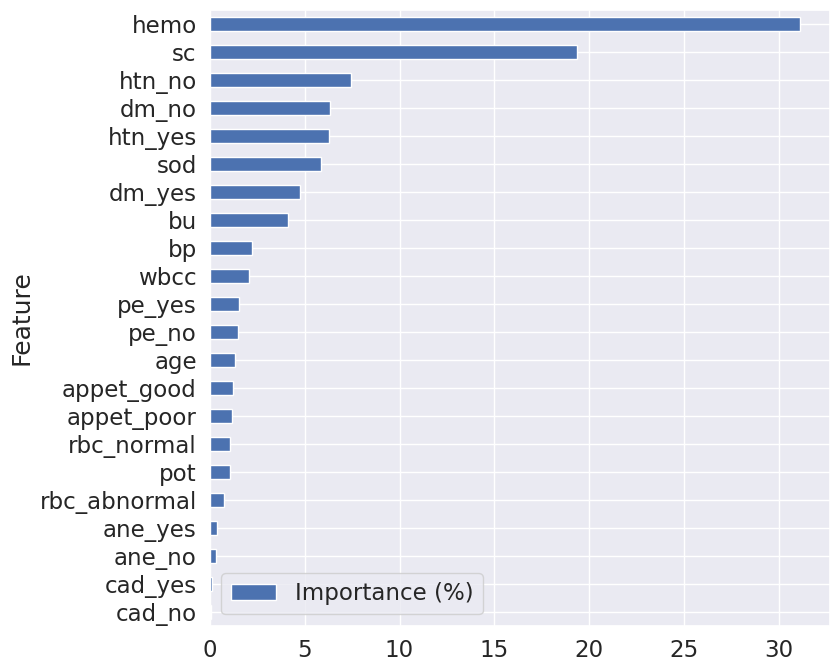

In [61]:
feature_importance = feature_importance.sort_values(by='Importance (%)', ascending=True)
feature_importance.plot(x='Feature', y='Importance (%)', kind='barh', figsize=(8, 8))

**This shows trained models feature importance for desciding whether a person has Chronic Kidney Disease is based on**

    1. Haemoglobin
    2. Serum creatinine
    3. Presence of Hypertension
    4. Presence of DM
    5. Serum sodium and pottasium values.............etc
    

## 5.6 Saving the Model

In [62]:
pickle.dump(best_model, open('ckd_best_model.pickle', "wb"))

In [63]:
loaded_pickle_model = pickle.load(open('ckd_best_model.pickle', "rb"))
loaded_pickle_model.score(X_test, y_test)

0.9625